In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (  # Метрики оценки качества модели
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt

# классификация

In [2]:
df_titanic = sns.load_dataset('titanic')

In [3]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df_titanic.select_dtypes(include='number').columns # берем только значимые целевые колонки

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [5]:
df_titanic['survived'].mean() # разбиение целевого признака

0.3838383838383838

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_titanic[['age', 'sibsp', 'parch', 'fare']],
                                                    df_titanic['survived'],
                                                    train_size=0.7, # доля трейн-а
                                                    stratify=df_titanic['survived'], # сохраняет распределение по таргету в трейне и тесте
                                                    random_state=1234 # фиксирует воспроизводимость
                                                    )

In [7]:
X_train

,age,sibsp,parch,fare
477,29.0,1,0,7.0458
60,22.0,0,0,7.2292
508,28.0,0,0,22.5250
799,30.0,1,1,24.1500
251,29.0,1,1,10.4625
...,...,...,...,...
789,46.0,0,0,79.2000
718,NaN,0,0,15.5000
872,33.0,0,0,5.0000
390,36.0,1,2,120.0000


In [8]:
X_test

,age,sibsp,parch,fare
132,47.0,1,0,14.5000
409,NaN,3,1,25.4667
247,24.0,0,2,14.5000
158,NaN,0,0,8.6625
791,16.0,0,0,26.0000
...,...,...,...,...
505,18.0,1,0,108.9000
829,62.0,0,0,80.0000
671,31.0,1,0,52.0000
5,NaN,0,0,8.4583


In [9]:
y_train.mean(), y_test.mean()

(0.38362760834670945, 0.3843283582089552)

In [10]:
X_train.isna().sum()

age      130
sibsp      0
parch      0
fare       0
dtype: int64

In [11]:
age_mean = X_train['age'].mean()
age_mean

29.63

In [12]:
X_train['age'] = X_train['age'].fillna(age_mean)

In [13]:
X_test['age'] = X_test['age'].fillna(age_mean)

In [14]:
# ?LogisticRegression

In [15]:
lg_model = LogisticRegression(random_state=1234)

In [16]:
lg_model.fit(X_train, y_train)

LogisticRegression(random_state=1234)

In [17]:
pred_train = lg_model.predict(X_train)
pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
pred_test = lg_model.predict(X_test)
pred_test


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0])

In [19]:
proba_1_test = lg_model.predict_proba(X_test)[:,1]
proba_1_test

array([0.2180022 , 0.22825874, 0.39512306, 0.31552766, 0.45287855,
       0.15389974, 0.3639574 , 0.32367509, 0.27089799, 0.29109589,
       0.32849566, 0.43286605, 0.3623012 , 0.35839547, 0.35725805,
       0.34980263, 0.5583346 , 0.35846604, 0.30278169, 0.58995134,
       0.39211319, 0.28651943, 0.66247537, 0.276692  , 0.34360892,
       0.29763684, 0.3118958 , 0.31984246, 0.37561243, 0.56465422,
       0.32315245, 0.35337164, 0.52744358, 0.37362668, 0.64380671,
       0.44126386, 0.24607901, 0.3315009 , 0.30152709, 0.27048496,
       0.50916006, 0.31240864, 0.67088369, 0.34970194, 0.30912527,
       0.29932951, 0.31888098, 0.65452921, 0.32604434, 0.31247457,
       0.30829799, 0.54990793, 0.27612116, 0.52157775, 0.31732152,
       0.3623012 , 0.22172375, 0.28868706, 0.38952847, 0.47585623,
       0.37808236, 0.30983323, 0.35353859, 0.35169265, 0.32559182,
       0.26008775, 0.28200372, 0.32294602, 0.30198635, 0.28199807,
       0.30400392, 0.44955589, 0.26205298, 0.35964391, 0.30159

In [20]:
proba_1_train = lg_model.predict_proba(X_train)[:,1]
proba_1_train

array([0.25627884, 0.3423941 , 0.38072877, 0.33114814, 0.28158667,
       0.30565627, 0.37127745, 0.31247457, 0.37269077, 0.60582539,
       0.63780146, 0.27404474, 0.36243045, 0.31240864, 0.73608696,
       0.31181328, 0.30984085, 0.3708364 , 0.42758138, 0.81813761,
       0.26150355, 0.9592145 , 0.36670949, 0.33664746, 0.1856492 ,
       0.34917661, 0.31016263, 0.37362265, 0.37009107, 0.29512179,
       0.96667413, 0.51574179, 0.61206208, 0.34586294, 0.70257311,
       0.32643591, 0.28398622, 0.57717388, 0.24799381, 0.38044316,
       0.59638826, 0.51595313, 0.34517419, 0.3118958 , 0.42222501,
       0.2313396 , 0.30179289, 0.97648861, 0.30326975, 0.30946328,
       0.35912187, 0.36243045, 0.81637968, 0.32463761, 0.29811502,
       0.34373399, 0.28444744, 0.58488374, 0.27775324, 0.32579909,
       0.34073773, 0.36107856, 0.33148844, 0.37075177, 0.39602054,
       0.43866539, 0.28585949, 0.41179581, 0.31228846, 0.28200372,
       0.46932023, 0.33032836, 0.30981663, 0.28468291, 0.31240

In [21]:
X_train['pred'] = proba_1_train

In [22]:
X_train

,age,sibsp,parch,fare,pred
477,29.00,1,0,7.0458,0.256279
60,22.00,0,0,7.2292,0.342394
508,28.00,0,0,22.5250,0.380729
799,30.00,1,1,24.1500,0.331148
251,29.00,1,1,10.4625,0.281587
...,...,...,...,...,...
789,46.00,0,0,79.2000,0.552687
718,29.63,0,0,15.5000,0.343441
872,33.00,0,0,5.0000,0.287493
390,36.00,1,2,120.0000,0.734586


In [23]:
precision_test = precision_score(y_test, pred_test)
precision_train = precision_score(y_train, pred_train)
precision_test, precision_train

(0.6470588235294118, 0.8045977011494253)

In [24]:
recall_score_test = recall_score(y_test, pred_test)
recall_score_train = recall_score(y_train, pred_train)
recall_score_test, recall_score_train

(0.21359223300970873, 0.2928870292887029)

In [25]:
roc_auc_test = roc_auc_score(y_test, proba_1_test)
roc_auc_train = roc_auc_score(y_train, proba_1_train)
roc_auc_test, roc_auc_train

(0.6952633127390409, 0.7224764644351465)

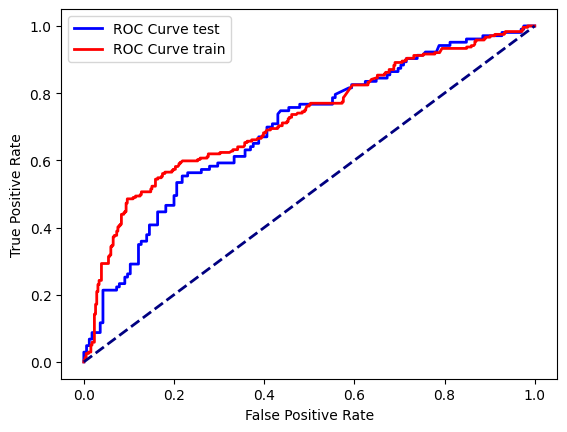

In [26]:
fpr_test, tpr_test, _ = roc_curve(y_test, proba_1_test)
fpr_train, tpr_train, _ = roc_curve(y_train, proba_1_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='ROC Curve test')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label='ROC Curve train')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title(f'ROC Curve ({type(model).__name__})')
plt.legend()
plt.show()

<font color='red' size=10> !!! так делать нельзя

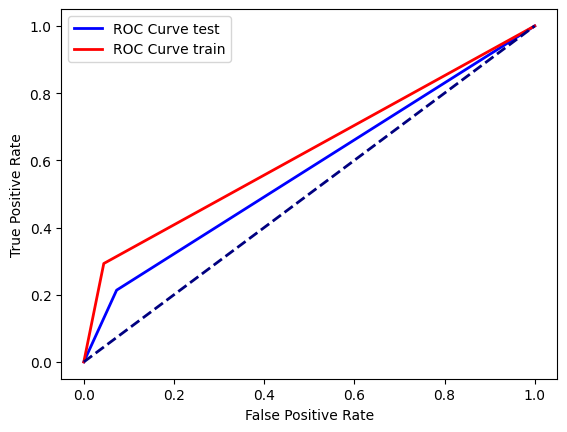

In [27]:
fpr_test, tpr_test, _ = roc_curve(y_test, pred_test)
fpr_train, tpr_train, _ = roc_curve(y_train, pred_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='ROC Curve test')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label='ROC Curve train')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title(f'ROC Curve ({type(model).__name__})')
plt.legend()
plt.show()